# _Applying algorithms on UJIIndoorLoc Dataset_

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
def getPath(csv_name): # Gets directory path to the UJIIndoorLoc dataset
    if os.name == 'nt': # Checks if os is Windows
        string = os.getcwd().split('\\')
        # Creates the path by retrieving path to mastersproject and then concatenates extra path to dataset
        path = string[:string.index('mastersproject')+1] + ['UJIIndoorLoc',csv_name]
        path = "\\".join(path)
    else: # Linux/Mac otherwise
        string = os.getcwd().split('/')
        # Creates the path by retrieving path to mastersproject and then concatenates extra path to dataset
        path = string[:string.index('mastersproject')+1] + ['UJIIndoorLoc',csv_name]  
        path = '/'.join(path)
    return path

In [3]:
# train_df = pd.read_csv(getPath('trainingData.csv'))
# valid_df = pd.read_csv(getPath('validationData.csv'))
train_df = pd.read_csv('../UJIIndoorLoc/trainingData.csv')
# train_df_noisy = pd.read_csv('../data/train_noisy.csv')
# train_df_noisy1 = pd.read_csv('../data/train_noisy1.csv')
# train_df_noisy2 = pd.read_csv('../data/train_noisy2.csv')
# train_df_noisy3 = pd.read_csv('../data/train_noisy3.csv')

# train_df = pd.concat([train_df, train_df_noisy], ignore_index=True)
# train_df = pd.concat([train_df, train_df_noisy1], ignore_index=True)
# train_df = pd.concat([train_df, train_df_noisy2], ignore_index=True)
# train_df = pd.concat([train_df, train_df_noisy3], ignore_index=True)
valid_df = pd.read_csv('../UJIIndoorLoc/validationData.csv')

In [4]:
training_data = train_df[train_df.columns[:520]].to_numpy()
training_floors = train_df['FLOOR'].to_numpy() # FLOOR LABELS
training_buildings = train_df['BUILDINGID'].to_numpy() # BUILDING LABELS
training_longitude = train_df['LONGITUDE'].to_numpy() # LONGITUDE LABELS
training_latitude = train_df['LATITUDE'].to_numpy() # LATITUDE LABELS
training_coords = train_df[['LONGITUDE','LATITUDE']].to_numpy() # LONGITUDE + LATITUDE LABELS

In [6]:
valid_data = valid_df[valid_df.columns[:520]].to_numpy()
valid_floors = valid_df['FLOOR'].to_numpy() # FLOOR LABELS
valid_buildings = valid_df['BUILDINGID'].to_numpy() # BUILDING LABELS
valid_longitude = valid_df['LONGITUDE'].to_numpy() # LONGITUDE LABELS
valid_latitude = valid_df['LATITUDE'].to_numpy() # LATITUDE LABELS
valid_coords = valid_df[['LONGITUDE','LATITUDE']].to_numpy() # LONGITUDE + LATITUDE LABELS

## Saving Results

In [7]:
import pickle

def save_predictions(name, predictions):
    with open('UJIIndoorLoc_results\\'+name, 'wb') as fp:
        pickle.dump(predictions, fp)

def load_predictions(name):
    with open ('UJIIndoorLoc_results\\'+name, 'rb') as fp:
        predictions = pickle.load(fp)
    return predictions

In [8]:
save_predictions('test', np.arange(120))

In [9]:
preds = load_predictions('test')
preds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [10]:
save_predictions('test2', [[2]*5]*5)

In [11]:
preds = load_predictions('test2')
preds

[[2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2]]

## Data Preprocessing

- StandardScaler is a class used for feature scaling. It transforms each feature (each column) as follows: z=(x−μ)/σ



In [12]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [14]:
def transform(array, mean, std):
    transformed = np.zeros(len(array))
    for i in range(len(transformed)):
        transformed[i] = (array[i] - mean)/std
    return transformed

def rev_transform(array, mean, std):
    rev_transform = np.zeros(len(array))
    for i in range(len(rev_transform)):
        rev_transform[i] = (array[i] * std) + mean
    return rev_transform

## Train Test Split

### Classification

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(training_data, training_buildings, test_size=0.2, random_state=2812)

In [17]:
X_trainF, X_testF, y_trainF, y_testF = train_test_split(training_data, training_floors, test_size=0.2, random_state=2812)

In [18]:
# Scaling data (Standard Scaler)
X_trainB_scaled = standard_scaler.fit_transform(X_trainB)
X_testB_scaled = standard_scaler.fit_transform(X_testB)
X_trainF_scaled = standard_scaler.fit_transform(X_trainF)
X_testF_scaled = standard_scaler.fit_transform(X_testF)

In [19]:
# Scaling data (MinMax Scaler)
X_trainB_mmscaled = minmax_scaler.fit_transform(X_trainB)
X_testB_mmscaled = minmax_scaler.fit_transform(X_testB)
X_trainF_mmscaled = minmax_scaler.fit_transform(X_trainF)
X_testF_mmscaled = minmax_scaler.fit_transform(X_testF)

### Regression

In [20]:
X_trainLon, X_testLon, y_trainLon, y_testLon = train_test_split(training_data, training_longitude, test_size=0.2, random_state=2812)

In [21]:
X_trainLat, X_testLat, y_trainLat, y_testLat = train_test_split(training_data, training_latitude, test_size=0.2, random_state=2812)

In [22]:
X_trainCo, X_testCo, y_trainCo, y_testCo = train_test_split(training_data, training_coords, test_size=0.2, random_state=2812)

In [23]:
X_trainLon_scaled = standard_scaler.fit_transform(X_trainLon)
X_testLon_scaled = standard_scaler.fit_transform(X_testLon)
X_trainLat_scaled = standard_scaler.fit_transform(X_trainLat)
X_testLat_scaled = standard_scaler.fit_transform(X_testLat)
X_trainCo_scaled = standard_scaler.fit_transform(X_trainCo)
X_testCo_scaled = standard_scaler.fit_transform(X_testCo)

## Feature Reduction

### Classification

In [24]:
# Using PCA dimensionality reduction to speed algorithms, having 520 values is increasing the complexity of the models.
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_trainB_reduced = pca.fit_transform(X_trainB_scaled)
X_testB_reduced = pca.fit_transform(X_testB_scaled)
X_trainF_reduced = pca.fit_transform(X_trainF_scaled)
X_testF_reduced = pca.fit_transform(X_testF_scaled)

In [25]:
X_trainB_reduced.shape, X_testB_reduced.shape

((79748, 10), (19937, 10))

In [26]:
pca.fit(X_trainB_scaled).explained_variance_ratio_

array([9.64370807e-01, 5.43041309e-03, 1.97292558e-03, 1.86881350e-03,
       1.72024071e-03, 1.40572318e-03, 1.30058309e-03, 1.17882632e-03,
       8.53575381e-04, 8.16155710e-04])

In [27]:
pca = PCA(n_components=2)
X_trainB_mmreduced = pca.fit_transform(X_trainB_mmscaled)
X_testB_mmreduced = pca.fit_transform(X_testB_mmscaled)
X_trainF_mmreduced = pca.fit_transform(X_trainF_mmscaled)
X_testF_mmreduced = pca.fit_transform(X_testF_mmscaled)

In [28]:
X_trainB_mmreduced.shape, X_testB_mmreduced.shape

((79748, 2), (19937, 2))

### Regression

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_trainLon_reduced = pca.fit_transform(X_trainLon_scaled)
X_testLon_reduced = pca.fit_transform(X_testLon_scaled)

X_trainLat_reduced = pca.fit_transform(X_trainLat_scaled)
X_testLat_reduced = pca.fit_transform(X_testLat_scaled)

X_trainCo_reduced = pca.fit_transform(X_trainCo_scaled)
X_testCo_reduced = pca.fit_transform(X_testCo_scaled)

# Tuning Algorithm Parameters

## KNN Classifier

In [ ]:
from KNN import KNN_clf

### Building Classifier

In [202]:
# Testing Building Classification (pca n_components=10)
for n in range(1,6):
    knn = KNN_clf(n_neighbours=n)
    knn.fit(X_trainB_reduced, y_trainB)
    preds = knn.predict(X_testB_reduced)
    print(f'Model Accuracy (KNN={n}): {knn.accuracy_metric(preds, y_testB) *100}%' )

KeyboardInterrupt: 

### Floor Classifier

In [ ]:
# Testing Floor Classification (pca n_components=10)
for n in range(1,6):
    knn = KNN_clf(n_neighbours=n)
    knn.fit(X_trainF_reduced, y_trainF)
    preds = knn.predict(X_testF_reduced)
    print(f'Model Accuracy (KNN={n}): {knn.accuracy_metric(preds, y_testF) *100}%' )

## Decision Tree Classifier

In [ ]:
from DecisionTree import DecisionTreeClassifier

In [ ]:
# Augment data so that X and y is together [X,y]
building_traindata = np.concatenate((X_trainB_reduced, y_trainB[:,None]),axis=1).tolist()
floor_traindata = np.concatenate((X_trainF_reduced, y_trainF[:,None]),axis=1).tolist()

In [ ]:
len(building_traindata), len(building_traindata[0])

### Building Classifier

In [ ]:
# Classifying Building
for i in range(2,6):
    dtc = DecisionTreeClassifier(max_depth=i,min_size=2)
    dtc.fit(building_traindata, print_tree=False)
    preds = dtc.decision_tree(X_testB_reduced)
    print(f"(max_depth={i}) DTC Test Accuracy: {dtc.accuracy_metric(y_testB, preds)*100}%")

### Floor Classifier

In [ ]:
# Classifying Floor
for i in range(2,6):
    dtc = DecisionTreeClassifier(max_depth=i,min_size=2)
    dtc.fit(floor_traindata, print_tree=False)
    preds = dtc.decision_tree(X_testF_reduced)
    print(f"(max_depth={i}) DTC Test Accuracy: {dtc.accuracy_metric(y_testF, preds)*100}%")

In [ ]:
for i in range(6,9):
    dtc = DecisionTreeClassifier(max_depth=i,min_size=2)
    dtc.fit(floor_traindata, print_tree=False)
    preds = dtc.decision_tree(X_testF_reduced)
    print(f"(max_depth={i}) DTC Test Accuracy: {dtc.accuracy_metric(y_testF, preds)*100}%")

## SVM

In [ ]:
from SVM import SVM

In [ ]:
X_trainB_mmreduced.shape, y_trainB.shape, X_testB_mmreduced.shape, y_testB.shape

### Building Classifier

In [ ]:
# Building Classification using Linear SVM
parameters = [0.01, 0.1, 1, 10, 100]
size_reduction = 6000
for c in parameters:
    svm = SVM(kernel='linear', C=c)
    print(f'(C={c})')
    svm.fit(X_trainB_mmreduced[:size_reduction], y_trainB[:size_reduction])
    print(f'SVM Test Accuracy: {svm.evaluate(X_testB_mmreduced, y_testB)[0]} %')

### Floor Classifier

In [ ]:
# Floor Classification using Linear SVM
parameters = [0.01, 0.1, 1, 10, 100]
size_reduction = 6000
for c in parameters:
    svm = SVM(kernel='linear', C=c)
    print(f'(C={c})')
    svm.fit(X_trainF_mmreduced[:size_reduction], y_trainF[:size_reduction])
    print(f'SVM Test Accuracy: {svm.evaluate(X_testF_mmreduced, y_testF)[0]} %')

In [ ]:
# Floor Classification using RBF SVM
parameters = [0.01, 0.1, 1, 10, 100]
size_reduction = 6000
for g in parameters:
    svm = SVM(kernel='rbf', C=1, gamma=g)
    print(f'(C=1,gamma={g})')
    svm.fit(X_trainF_mmreduced[:size_reduction], y_trainF[:size_reduction])
    print(f'SVM Test Accuracy: {svm.evaluate(X_testF_mmreduced, y_testF)[0]} %')

## CNN Classifier

In [236]:
# Augmenting data shape to fit 23x23
training_data_aug = np.empty((len(training_data),529))
for x in range(len(training_data)):
    training_data_aug[x] = np.concatenate((training_data[x], np.full(shape=9,fill_value=100)))
training_data_aug.shape
# training_data_aug = training_data

(99685, 529)

In [237]:
from sklearn.model_selection import train_test_split
X_trainB_cnn, X_testB_cnn, y_trainB_cnn, y_testB_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_buildings, test_size=0.2, random_state=2812)
X_trainF_cnn, X_testF_cnn, y_trainF_cnn, y_testF_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_floors, test_size=0.2, random_state=2812)

In [238]:
X_trainB_cnn.shape, X_testB_cnn.shape, y_trainB_cnn.shape, y_testB_cnn.shape

((79748, 23, 23), (19937, 23, 23), (79748,), (19937,))

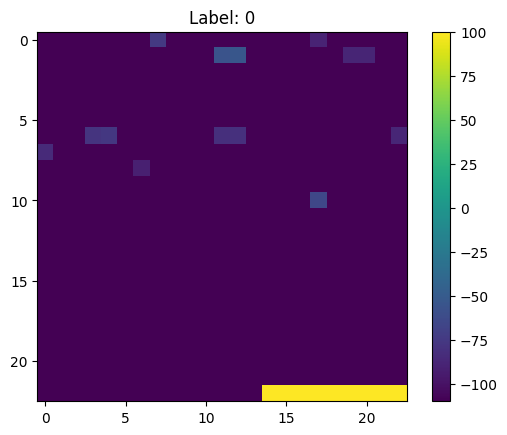

In [239]:
import matplotlib.pyplot as plt
single_image = X_trainB_cnn[0]
plt.imshow(single_image)
plt.title(f'Label: {y_trainB_cnn[0]}')
plt.colorbar()
plt.show()

### Building Classifier

In [169]:
from CNN import CNNClassifier
# Building Classifier
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNClassifier(n_classes=3, dropout=val) # There are three classes (Building 0, 1, 2)
    cnn.fit(X_trainB_cnn, y_trainB_cnn, X_testB_cnn, y_testB_cnn)
    cnn.train(num_epochs=10,eval_train=True)

(Dropout: 0.1)
Epoch [1/10], Step [479/479], Loss: 0.1523
Training Accuracy: 97.85153198242188
Test Accuracy: 97.76811218261719
------------------------------
Epoch [2/10], Step [479/479], Loss: 0.0031
Training Accuracy: 99.29568481445312
Test Accuracy: 99.25604248046875
------------------------------


KeyboardInterrupt: 

### Floor Classifier

In [240]:
from CNN import CNNClassifier
# Floor Classifier
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNClassifier(n_classes=5, dropout=val) # There are five classes (Floor 0, 1, 2, 3, 4)
    cnn.fit(X_trainF_cnn, y_trainF_cnn, X_testF_cnn, y_testF_cnn)
    cnn.train(num_epochs=50,eval_train=True)

(Dropout: 0.1)
Epoch [1/50], Step [798/798], Loss: 1.1430
Training Accuracy: 58.16823196411133
Test Accuracy: 57.7669677734375
------------------------------
Epoch [2/50], Step [798/798], Loss: 0.4897
Training Accuracy: 82.84471130371094
Test Accuracy: 82.61022186279297
------------------------------
Epoch [3/50], Step [798/798], Loss: 0.2058
Training Accuracy: 90.47122955322266
Test Accuracy: 90.15899658203125
------------------------------
Epoch [4/50], Step [798/798], Loss: 0.2441
Training Accuracy: 92.03365325927734
Test Accuracy: 91.87942504882812
------------------------------
Epoch [5/50], Step [798/798], Loss: 0.0933
Training Accuracy: 93.18102264404297
Test Accuracy: 92.84245300292969
------------------------------
Epoch [6/50], Step [798/798], Loss: 0.0756
Training Accuracy: 93.80423736572266
Test Accuracy: 93.42428588867188
------------------------------
Epoch [7/50], Step [798/798], Loss: 0.0733
Training Accuracy: 94.34342956542969
Test Accuracy: 93.79044342041016
---------

KeyboardInterrupt: 

## Linear Regression

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score

# Scale Targets
y_trainLat_trans = transform(y_trainLat, np.mean(y_trainLat), np.std(y_trainLat))
y_testLat_trans = transform(y_testLat, np.mean(y_trainLat), np.std(y_trainLat))

# For Latitude
print(f'All Features')
lr_model = LinearRegression()
lr_model.fit(X_trainLat, y_trainLat_trans)
pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(X_testLat, y_testLat_trans)
print(f'Train R^2: {r2_score(y_trainLat, rev_transform(pred_Train, np.mean(y_trainLat), np.std(y_trainLat)))}')
print(f'Test R^2: {r2_score(y_testLat, rev_transform(pred_Test, np.mean(y_trainLat), np.std(y_trainLat)))}\n')

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score

# Scale Targets
y_trainLon_trans = transform(y_trainLon, np.mean(y_trainLon), np.std(y_trainLon))
y_testLon_trans = transform(y_testLon, np.mean(y_trainLon), np.std(y_trainLon))

# For Latitude
print(f'All Features')
lr_model = LinearRegression()
lr_model.fit(X_trainLon, y_trainLon_trans)
pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(X_testLon, y_testLon_trans)
print(f'Train R^2: {r2_score(y_trainLon, rev_transform(pred_Train, np.mean(y_trainLon), np.std(y_trainLon)))}')
print(f'Test R^2: {r2_score(y_testLon, rev_transform(pred_Test, np.mean(y_trainLon), np.std(y_trainLon)))}\n')

## KNN Regressor

In [ ]:
from KNN import KNN_reg

# Longitude Regression (pca n_components=10)
for n in range(1,6):
    knn = KNN_reg(n_neighbours=n)
    knn.fit(X_trainLon_reduced, y_trainLon)
    preds = knn.predict(X_testLon_reduced)
    print(f'(KNN={n})')
    print(f'Test MSE: {knn.MSE_metric(preds, y_testLon)}')
    print(f'Test R^2: {knn.r2_metric(preds, y_testLon)}\n')

In [ ]:
# Latitude Regression (pca n_components=10)
for n in range(1,6):
    knn = KNN_reg(n_neighbours=n)
    knn.fit(X_trainLat_reduced, y_trainLat)
    preds = knn.predict(X_testLat_reduced)
    print(f'(KNN={n})')
    print(f'Test MSE: {knn.MSE_metric(preds, y_testLat)}')
    print(f'Test R^2: {knn.r2_metric(preds, y_testLat)}\n')

In [ ]:
# Longitude+Latitude (Coord) Regression (pca n_components=10)
for n in range(1,6):
    knn = KNN_reg(n_neighbours=n, n_targets=2)
    knn.fit(X_trainCo_reduced, y_trainCo)
    preds = knn.predict(X_testCo_reduced)
    print(f'(KNN={n})')
    print(f'Test MSE: {knn.MSE_metric(preds, y_testCo)}')
    print(f'Test R^2: {knn.r2_metric(preds, y_testCo)}\n')

## Decision Tree Regressor

In [ ]:
lon_traindata = np.concatenate((X_trainLon_reduced, y_trainLon[:,None]),axis=1).tolist()
lat_traindata = np.concatenate((X_trainLat_reduced, y_trainLat[:,None]),axis=1).tolist()

In [ ]:
from DecisionTree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Longitude Regression
for i in range(3,9):
    dtr = DecisionTreeRegressor(max_depth=i,min_size=2)
    dtr.fit(lon_traindata, print_tree=False)
    print(f'(max_depth={i})')
    preds = dtr.decision_tree(X_testLon_reduced)
    print(f"DTR Test MSE: {dtr.accuracy_metric(y_testLon, preds)}")
    print(f"DTR Test R^2: {r2_score(y_testLon, preds)}\n")

In [ ]:
# Latitude Regression
for i in range(3,9):
    dtr = DecisionTreeRegressor(max_depth=i,min_size=2)
    dtr.fit(lat_traindata, print_tree=False)
    print(f'(max_depth={i})')
    preds = dtr.decision_tree(X_testLat_reduced)
    print(f"DTR Test MSE: {dtr.accuracy_metric(y_testLat, preds)}")
    print(f"DTR Test R^2: {r2_score(y_testLat, preds)}\n")

## CNN Regressor

In [30]:
# Augmenting data shape to fit 23x23
training_data_aug = np.empty((len(training_data),529))
for x in range(len(training_data)):
    training_data_aug[x] = np.concatenate((training_data[x], np.full(shape=9,fill_value=100)))
training_data_aug.shape

(99685, 529)

In [31]:
from sklearn.model_selection import train_test_split
X_trainLon_cnn, X_testLon_cnn, y_trainLon_cnn, y_testLon_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_longitude, test_size=0.2, random_state=2812)
X_trainLat_cnn, X_testLat_cnn, y_trainLat_cnn, y_testLat_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_latitude, test_size=0.2, random_state=2812)
X_trainCo_cnn, X_testCo_cnn, y_trainCo_cnn, y_testCo_cnn = train_test_split(training_data_aug.reshape(len(training_data_aug),23,23), training_coords, test_size=0.2, random_state=2812)

In [32]:
# Scaling Targets
y_trainLon_cnn_scaled = standard_scaler.fit_transform(y_trainLon_cnn.reshape(-1,1))
y_testLon_cnn_scaled = standard_scaler.fit_transform(y_testLon_cnn.reshape(-1,1))

y_trainLat_cnn_scaled = standard_scaler.fit_transform(y_trainLat_cnn.reshape(-1,1))
y_testLat_cnn_scaled = standard_scaler.fit_transform(y_testLat_cnn.reshape(-1,1))

y_trainCo_cnn_scaled = standard_scaler.fit_transform(y_trainCo_cnn)
y_testCo_cnn_scaled = standard_scaler.fit_transform(y_testCo_cnn)

In [33]:
y_trainLon_cnn_scaled.shape

(79748, 1)

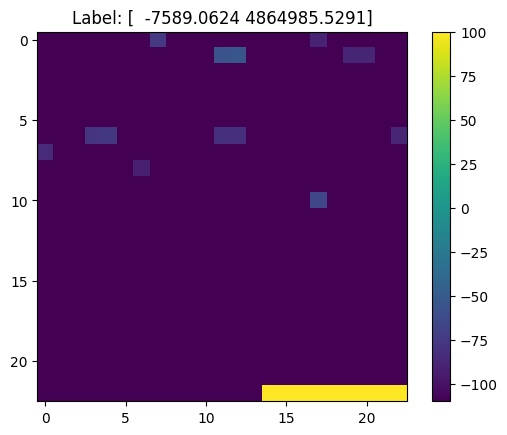

In [34]:
import matplotlib.pyplot as plt
single_image = X_trainCo_cnn[0]
plt.imshow(single_image)
plt.title(f'Label: {y_trainCo_cnn[0]}')
plt.colorbar()
plt.show()

In [ ]:
from CNN import CNNRegressor
# Longitude Regressor (unscaled)
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Finding Longitude
    cnn.fit(X_trainLon_cnn, y_trainLon_cnn, X_testLon_cnn, y_testLon_cnn)
    cnn.train(num_epochs=10,eval_train=True)

In [ ]:
from CNN import CNNRegressor
# Latitude Regressor (unscaled)
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Latitude is target
    cnn.fit(X_trainLat_cnn, y_trainLat_cnn, X_testLat_cnn, y_testLat_cnn)
    cnn.train(num_epochs=10,eval_train=True)

In [ ]:
from CNN import CNNRegressor
# Longitude Regressor Scaled
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Finding Longitude
    cnn.fit(X_trainLon_cnn, y_trainLon_cnn_scaled, X_testLon_cnn, y_testLon_cnn_scaled)
    cnn.train(num_epochs=10,eval_train=True)

In [ ]:
from CNN import CNNRegressor
# Latitude Regressor Scaled
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Finding Longitude
    cnn.fit(X_trainLat_cnn, y_trainLat_cnn_scaled, X_testLat_cnn, y_testLat_cnn_scaled)
    cnn.train(num_epochs=10,eval_train=True)

In [37]:
from CNN import CNNRegressor
# Longitude+Latitude Regressor
dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=2, dropout=val) # Longitude + Latitude are targets
    cnn.fit(X_trainCo_cnn, y_trainCo_cnn_scaled, X_testCo_cnn, y_testCo_cnn_scaled)
    cnn.train(num_epochs=10,eval_train=True)

(Dropout: 0.1)
Epoch [1/10], Step [798/798], Loss: 0.3275
[[-1.26179993  1.66289973]
 [-0.03640263  0.09076018]
 [ 0.67677641 -0.33478436]
 ...
 [-0.1792599  -0.22936812]
 [ 0.21271661  0.10639708]
 [-1.86173916  0.79772246]]
[[-1.01322198  1.71493745]
 [ 0.73773795 -0.3877869 ]
 [ 1.08130395 -0.67125326]
 ...
 [ 0.31865713 -0.11211964]
 [-0.79541224 -0.06054152]
 [-1.58771324  1.01624155]]
平均欧拉距离（Euclidean Distance）: 0.8039
[[ 1.27791619 -1.60511816]
 [-0.71414942  0.72287661]
 [-0.33860934  0.11274325]
 ...
 [ 0.38518119 -0.07497371]
 [-0.02420976  0.10435491]
 [-1.78326058  1.32164192]]
[[ 1.13244915 -0.78659475]
 [-1.71238804  0.93662113]
 [-0.16472998  0.05317391]
 ...
 [ 0.8564167  -0.50473136]
 [-0.01492348 -0.75595385]
 [-1.5917027   1.000646  ]]
平均欧拉距离（Euclidean Distance）: 0.8038
Training MSE: 0.42722779512405396
Training r^2: 0.5727729280986077
Test MSE: 0.4262380003929138
Test r^2: 0.5737619674119232
------------------------------
Epoch [2/10], Step [798/798], Loss: 0.2776
[

# Using Building predictions

This section uses the predicted building information to improve floor classification and regression tasks. 

In [ ]:
build0 = train_df[train_df['BUILDINGID']==0]
build1 = train_df[train_df['BUILDINGID']==1]
build2 = train_df[train_df['BUILDINGID']==2]

In [ ]:
build0_train = build0[build0.columns[:520]].to_numpy()
build1_train = build1[build1.columns[:520]].to_numpy()
build2_train = build2[build2.columns[:520]].to_numpy()

In [ ]:
build0_train.shape

In [ ]:
build0_floor = build0['FLOOR'].to_numpy()
build1_floor = build1['FLOOR'].to_numpy()
build2_floor = build2['FLOOR'].to_numpy()

In [ ]:
build0_floor.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_trainb0, X_testb0, y_trainb0, y_testb0 = train_test_split(build0_train, build0_floor, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb1, X_testb1, y_trainb1, y_testb1 = train_test_split(build1_train, build1_floor, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb2, X_testb2, y_trainb2, y_testb2 = train_test_split(build2_train, build2_floor, test_size=len(valid_data)/len(training_data), random_state=2812)

In [ ]:
X_trainb0.shape, X_testb0.shape

In [ ]:
X_trainb1.shape, X_testb1.shape

In [ ]:
X_trainb2.shape, X_testb2.shape

## KNN Floor Classifier + Building prediction information

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Building 0 - Best K=3
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_trainb0, y_trainb0)
    print(f'(KNN={i}) Accuracy: {neigh.score(X_testb0, y_testb0)*100}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Building 1 - Best K=7
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_trainb1, y_trainb1)
    print(f'(KNN={i}) Accuracy: {neigh.score(X_testb1, y_testb1)*100}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Building 2 - Best K=3
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_trainb2, y_trainb2)
    print(f'(KNN={i}) Accuracy: {neigh.score(X_testb2, y_testb2)*100}')

## DT Floor Classifier + Building prediction information

In [ ]:
# Building 0 - Best Depth 17
from sklearn.tree import DecisionTreeClassifier
for i in range(5, 31):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2812)
    clf = clf.fit(X_trainb0, y_trainb0)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb0, y_testb0) * 100}%')

In [ ]:
# Building 1 - Best Depth 18
from sklearn.tree import DecisionTreeClassifier
for i in range(5, 31):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2812)
    clf = clf.fit(X_trainb1, y_trainb1)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb1, y_testb1) * 100}%')

In [ ]:
# Building 2 - Best Depth 18
from sklearn.tree import DecisionTreeClassifier
for i in range(5, 31):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2812)
    clf = clf.fit(X_trainb2, y_trainb2)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb2, y_testb2) * 100}%')

## SVM Floor Classifier + Building prediction information

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Building 0 - Best C: 0.001
C = [0.0001, 0.001, 0.01, 0.1]
for c in C:
    clf = OneVsRestClassifier(SVC(kernel='linear',C=c, random_state=2812)).fit(X_trainb0, y_trainb0)
    print(f'(C={c}) Accuracy: {clf.score(X_testb0, y_testb0) * 100}%')

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Building 1 - Best C: 0.01
C = [0.0001, 0.001, 0.01, 0.1]
for c in C:
    clf = OneVsRestClassifier(SVC(kernel='linear',C=c, random_state=2812)).fit(X_trainb1, y_trainb1)
    print(f'(C={c}) Accuracy: {clf.score(X_testb1, y_testb1) * 100}%')

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Building 2 - Best C: 0.01
C = [0.0001, 0.001, 0.01, 0.1]
for c in C:
    clf = OneVsRestClassifier(SVC(kernel='linear',C=c, random_state=2812)).fit(X_trainb2, y_trainb2)
    print(f'(C={c}) Accuracy: {clf.score(X_testb2, y_testb2) * 100}%')

## CNN Floor Classifier + Building prediction information

In [ ]:
# Augmenting data shape to fit 23x23 (Building 0)
X_trainb0_aug = np.empty((len(X_trainb0),529))
X_testb0_aug = np.empty((len(X_testb0), 529))
for x in range(len(X_trainb0)):
    X_trainb0_aug[x] = np.concatenate((X_trainb0[x], np.full(shape=9,fill_value=100)))
X_trainb0_aug = X_trainb0_aug.reshape(len(X_trainb0_aug),23,23)
for x in range(len(X_testb0)):
    X_testb0_aug[x] = np.concatenate((X_testb0[x], np.full(shape=9,fill_value=100)))    
X_testb0_aug = X_testb0_aug.reshape(len(X_testb0_aug),23,23)

X_trainb0_aug.shape, X_testb0_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23 (Building 1)
X_trainb1_aug = np.empty((len(X_trainb1),529))
X_testb1_aug = np.empty((len(X_testb1), 529))
for x in range(len(X_trainb1)):
    X_trainb1_aug[x] = np.concatenate((X_trainb1[x], np.full(shape=9,fill_value=100)))
X_trainb1_aug = X_trainb1_aug.reshape(len(X_trainb1_aug),23,23)
for x in range(len(X_testb1)):
    X_testb1_aug[x] = np.concatenate((X_testb1[x], np.full(shape=9,fill_value=100)))    
X_testb1_aug = X_testb1_aug.reshape(len(X_testb1_aug),23,23)

X_trainb1_aug.shape, X_testb1_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23 (Building 2)
X_trainb2_aug = np.empty((len(X_trainb2),529))
X_testb2_aug = np.empty((len(X_testb2), 529))
for x in range(len(X_trainb2)):
    X_trainb2_aug[x] = np.concatenate((X_trainb2[x], np.full(shape=9,fill_value=100)))
X_trainb2_aug = X_trainb2_aug.reshape(len(X_trainb2_aug),23,23)
for x in range(len(X_testb2)):
    X_testb2_aug[x] = np.concatenate((X_testb2[x], np.full(shape=9,fill_value=100)))    
X_testb2_aug = X_testb2_aug.reshape(len(X_testb2_aug),23,23)

X_trainb2_aug.shape, X_testb2_aug.shape

### Building 0

In [ ]:
from CNN import CNNClassifier
# Floor Classifier for Building 0
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNClassifier(n_classes=4, dropout=val) # There are four classes (Floor 0, 1, 2, 3)
    cnn.fit(X_trainb0_aug, y_trainb0, X_testb0_aug, y_testb0)
    cnn.train(num_epochs=10,eval_train=False)

### Building 1

In [ ]:
from CNN import CNNClassifier
# Floor Classifier for Building 1
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNClassifier(n_classes=4, dropout=val) # There are four classes (Floor 0, 1, 2, 3)
    cnn.fit(X_trainb1_aug, y_trainb1, X_testb1_aug, y_testb1)
    cnn.train(num_epochs=10,eval_train=False)

### Building 2

In [ ]:
from CNN import CNNClassifier
# Floor Classifier for Building 2
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNClassifier(n_classes=5, dropout=val) # There are five classes (Floor 0, 1, 2, 3, 4)
    cnn.fit(X_trainb2_aug, y_trainb2, X_testb2_aug, y_testb2)
    cnn.train(num_epochs=10,eval_train=False)

## Regression with Building Predictions

In [ ]:
build0_lon = build0['LONGITUDE'].to_numpy()
build1_lon = build1['LONGITUDE'].to_numpy()
build2_lon = build2['LONGITUDE'].to_numpy()

build0_lat = build0['LATITUDE'].to_numpy()
build1_lat = build1['LATITUDE'].to_numpy()
build2_lat = build2['LATITUDE'].to_numpy()

build0_coord = build0[['LONGITUDE','LATITUDE']].to_numpy()
build1_coord = build1[['LONGITUDE','LATITUDE']].to_numpy()
build2_coord = build2[['LONGITUDE','LATITUDE']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_trainb0_lon, X_testb0_lon, y_trainb0_lon, y_testb0_lon = train_test_split(build0_train, build0_lon, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb1_lon, X_testb1_lon, y_trainb1_lon, y_testb1_lon = train_test_split(build1_train, build1_lon, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb2_lon, X_testb2_lon, y_trainb2_lon, y_testb2_lon = train_test_split(build2_train, build2_lon, test_size=len(valid_data)/len(training_data), random_state=2812)

X_trainb0_lat, X_testb0_lat, y_trainb0_lat, y_testb0_lat = train_test_split(build0_train, build0_lat, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb1_lat, X_testb1_lat, y_trainb1_lat, y_testb1_lat = train_test_split(build1_train, build1_lat, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb2_lat, X_testb2_lat, y_trainb2_lat, y_testb2_lat = train_test_split(build2_train, build2_lat, test_size=len(valid_data)/len(training_data), random_state=2812)

X_trainb0_coord, X_testb0_coord, y_trainb0_coord, y_testb0_coord = train_test_split(build0_train, build0_coord, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb1_coord, X_testb1_coord, y_trainb1_coord, y_testb1_coord = train_test_split(build1_train, build1_coord, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainb2_coord, X_testb2_coord, y_trainb2_coord, y_testb2_coord = train_test_split(build2_train, build2_coord, test_size=len(valid_data)/len(training_data), random_state=2812)

## KNN Regressor + Building Predictions

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Best K=2
build_data = [[X_trainb0_coord, y_trainb0_coord, X_testb0_coord, y_testb0_coord],
              [X_trainb1_coord, y_trainb1_coord, X_testb1_coord, y_testb1_coord],
              [X_trainb2_coord, y_trainb2_coord, X_testb2_coord, y_testb2_coord]]

for n in range(len(build_data)):
    print(f'Building {n}')
    for i in range(1,11):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(build_data[n][0], build_data[n][1])
        print(f'(KNN={i}) R2 Score: {knn.score(build_data[n][2], build_data[n][3])}')

## Linear Regression + Building predictions

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score
# For Longitude
print(f'All Features on Longitude')
build_data = [[X_trainb0_lon, transform(y_trainb0_lon, np.mean(y_trainb0_lon), np.std(y_trainb0_lon)), X_testb0_lon, transform(y_testb0_lon, np.mean(y_trainb0_lon), np.std(y_trainb0_lon))],
              [X_trainb1_lon, transform(y_trainb1_lon, np.mean(y_trainb1_lon), np.std(y_trainb1_lon)), X_testb1_lon, transform(y_testb1_lon, np.mean(y_trainb1_lon), np.std(y_trainb1_lon))],
              [X_trainb2_lon, transform(y_trainb2_lon, np.mean(y_trainb2_lon), np.std(y_trainb2_lon)), X_testb2_lon, transform(y_testb2_lon, np.mean(y_trainb2_lon), np.std(y_trainb2_lon))]]

for i in range(len(build_data)):
    print(f'Building {i}')
    lr_model = LinearRegression()
    lr_model.fit(build_data[i][0], build_data[i][1])
    pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(build_data[i][2],build_data[i][3])
    if i == 0:
        print(f'Test R^2: {r2_score(y_testb0_lon, rev_transform(pred_Test,np.mean(y_trainb0_lon),np.std(y_trainb0_lon)))}\n')
    elif i == 1:
        print(f'Test R^2: {r2_score(y_testb1_lon, rev_transform(pred_Test,np.mean(y_trainb1_lon),np.std(y_trainb1_lon)))}\n')
    else:
        print(f'Test R^2: {r2_score(y_testb2_lon, rev_transform(pred_Test,np.mean(y_trainb2_lon),np.std(y_trainb2_lon)))}\n')

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score
# For Latitude (Have to transform the targets, otherwise performance is poor)
print(f'All Features on Latitude')
build_data = [[X_trainb0_lat, transform(y_trainb0_lat,np.mean(y_trainb0_lat),np.std(y_trainb0_lat)), X_testb0_lat, transform(y_testb0_lat,np.mean(y_trainb0_lat),np.std(y_trainb0_lat))],
              [X_trainb1_lat, transform(y_trainb1_lat,np.mean(y_trainb1_lat),np.std(y_trainb1_lat)), X_testb1_lat, transform(y_testb1_lat,np.mean(y_trainb1_lat),np.std(y_trainb1_lat))],
              [X_trainb2_lat, transform(y_trainb2_lat,np.mean(y_trainb2_lat),np.std(y_trainb2_lat)), X_testb2_lat, transform(y_testb2_lat,np.mean(y_trainb2_lat),np.std(y_trainb2_lat))]]

for i in range(len(build_data)):
    print(f'Building {i}')
    lr_model = LinearRegression()
    lr_model.fit(build_data[i][0], build_data[i][1])
    pred_Train, pred_Test, MSEtrain, MSEtest = lr_model.predict(build_data[i][2],build_data[i][3])
    if i == 0:
        print(f'Test R^2: {r2_score(y_testb0_lat, rev_transform(pred_Test,np.mean(y_trainb0_lat),np.std(y_trainb0_lat)))}\n')
    elif i == 1:
        print(f'Test R^2: {r2_score(y_testb1_lat, rev_transform(pred_Test,np.mean(y_trainb1_lat),np.std(y_trainb1_lat)))}\n')
    else:
        print(f'Test R^2: {r2_score(y_testb2_lat, rev_transform(pred_Test,np.mean(y_trainb2_lat),np.std(y_trainb2_lat)))}\n')

## DTR + Building Predictions

### Building 0

In [ ]:
# Building 0 Longitude - Best Depth 13
from sklearn.tree import DecisionTreeRegressor
for i in range(5, 16):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb0_lon, y_trainb0_lon)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb0_lon, y_testb0_lon) * 100}%')

In [ ]:
# Building 0 Latitude - Best Depth 11
for i in range(5, 20):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb0_lat, y_trainb0_lat)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb0_lon, y_testb0_lat) * 100}%')

### Building 1

In [ ]:
# Building 1 Longitude - Best Depth 26
for i in range(15, 31):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb1_lon, y_trainb1_lon)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb1_lon, y_testb1_lon) * 100}%')

In [ ]:
# Building 1 Latitude - Best Depth 17
for i in range(15, 31):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb1_lat, y_trainb1_lat)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb1_lat, y_testb1_lat) * 100}%')

### Building 2

In [ ]:
# Building 2 Longitude - Best Depth 32
for i in range(25, 41):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb2_lon, y_trainb2_lon)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb2_lon, y_testb2_lon) * 100}%')

In [ ]:
# Building 2 Latitude - Best Depth 25
for i in range(15, 31):
    clf = DecisionTreeRegressor(max_depth=i, criterion='squared_error', random_state=2812)
    clf = clf.fit(X_trainb2_lat, y_trainb2_lat)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testb2_lat, y_testb2_lat) * 100}%')

## CNN Regression + Building Predictions

In [ ]:
# Augmenting data shape to fit 23x23 (Building 0)
X_trainb0_lon_aug = np.empty((len(X_trainb0_lon),529))
X_testb0_lon_aug = np.empty((len(X_testb0_lon), 529))
for x in range(len(X_trainb0_lon)):
    X_trainb0_lon_aug[x] = np.concatenate((X_trainb0_lon[x], np.full(shape=9,fill_value=100)))
X_trainb0_lon_aug = X_trainb0_lon_aug.reshape(len(X_trainb0_lon_aug),23,23)
for x in range(len(X_testb0_lon)):
    X_testb0_lon_aug[x] = np.concatenate((X_testb0_lon[x], np.full(shape=9,fill_value=100)))    
X_testb0_lon_aug = X_testb0_lon_aug.reshape(len(X_testb0_lon_aug),23,23)

X_trainb0_lon_aug.shape, X_testb0_lon_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23 (Building 0)
X_trainb0_lat_aug = np.empty((len(X_trainb0_lat),529))
X_testb0_lat_aug = np.empty((len(X_testb0_lat), 529))
for x in range(len(X_trainb0_lat)):
    X_trainb0_lat_aug[x] = np.concatenate((X_trainb0_lat[x], np.full(shape=9,fill_value=100)))
X_trainb0_lat_aug = X_trainb0_lat_aug.reshape(len(X_trainb0_lat_aug),23,23)
for x in range(len(X_testb0_lat)):
    X_testb0_lat_aug[x] = np.concatenate((X_testb0_lat[x], np.full(shape=9,fill_value=100)))    
X_testb0_lat_aug = X_testb0_lat_aug.reshape(len(X_testb0_lat_aug),23,23)

X_trainb0_lat_aug.shape, X_testb0_lat_aug.shape

In [ ]:
# Transforming targets
y_trainb0_lon_trans = transform(y_trainb0_lon, np.mean(y_trainb0_lon), np.std(y_trainb0_lon))
y_testb0_lon_trans = transform(y_testb0_lon, np.mean(y_trainb0_lon), np.std(y_trainb0_lon))

y_trainb0_lat_trans = transform(y_trainb0_lat, np.mean(y_trainb0_lat), np.std(y_trainb0_lat))
y_testb0_lat_trans = transform(y_testb0_lat, np.mean(y_trainb0_lat), np.std(y_trainb0_lat))

In [ ]:
from CNN import CNNRegressor
# Longitude Regressor
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Finding Longitude
    cnn.fit(X_trainb0_lon_aug, y_trainb0_lon_trans, X_testb0_lon_aug, y_testb0_lon_trans)
    cnn.train(num_epochs=10,eval_train=False)

In [ ]:
from CNN import CNNRegressor
# Latitude Regressor
dropout = [0.1, 0.2, 0.3]
for val in dropout:
    print(f'(Dropout: {val})')
    cnn = CNNRegressor(n_targets=1, dropout=val) # Finding Longitude
    cnn.fit(X_trainb0_lat_aug, y_trainb0_lat_trans, X_testb0_lat_aug, y_testb0_lat_trans)
    cnn.train(num_epochs=10,eval_train=False)

# Algorithms on UJIIndoorLoc Validation Data

## KNN Classifier 

In [ ]:
training_data.shape, training_buildings.shape, valid_data.shape, valid_buildings.shape

In [ ]:
training_data_scaled = standard_scaler.fit_transform(training_data)
valid_data_scaled = standard_scaler.fit_transform(valid_data)

In [ ]:
from KNN import KNN_clf

# Ideal Building Classification: KNN=3

knn = KNN_clf(n_neighbours=3)
knn.fit(training_data_scaled, training_buildings)
knn_clf_scaled_building_preds = knn.predict(valid_data_scaled)
print(f'Model Accuracy: {knn.accuracy_metric(knn_clf_scaled_building_preds, valid_buildings) *100}%' )

In [ ]:
save_predictions('knn_clf_building', knn_clf_scaled_building_preds)

In [ ]:
from KNN import KNN_clf

# Ideal Floor Classification: KNN=4
knn = KNN_clf(n_neighbours=4)
knn.fit(training_data_scaled, training_floors)
knn_clf_scaled_floor_preds = knn.predict(valid_data_scaled)
print(f'Model Accuracy: {knn.accuracy_metric(knn_clf_scaled_floor_preds, valid_floors) *100}%' )

In [ ]:
save_predictions('knn_clf_floor', knn_clf_scaled_floor_preds)

In [ ]:
from KNN import KNN_clf

# Ideal Building Classification: KNN=3 (Unscaled)

knn = KNN_clf(n_neighbours=3)
knn.fit(training_data, training_buildings)
knn_clf_building_preds = knn.predict(valid_data)
print(f'Model Accuracy: {knn.accuracy_metric(knn_clf_building_preds, valid_buildings) *100}%' )

In [ ]:
save_predictions('knn_clf_building_unscaled', knn_clf_building_preds)

In [ ]:
from KNN import KNN_clf

# Ideal Floor Classification: KNN=4 (Unscaled)
knn = KNN_clf(n_neighbours=4)
knn.fit(training_data, training_floors)
knn_clf_floor_preds = knn.predict(valid_data)
print(f'Model Accuracy: {knn.accuracy_metric(knn_clf_floor_preds, valid_floors) *100}%' )

In [ ]:
save_predictions('knn_clf_floor_unscaled', knn_clf_floor_preds)

### Testing against sklearn KneighboursClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = train_test_split(training_data, training_buildings, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(training_data, training_floors, test_size=len(valid_data)/len(training_data), random_state=2812)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_trainB, y_trainB)
    print(f'(KNN={i}) Accuracy: {neigh.score(X_testB, y_testB)*100}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(training_data, training_buildings)
preds = neigh.predict(valid_data)
print(f'Accuracy: {(sum(preds[i] == valid_buildings[i] for i in range(len(valid_buildings)))/len(valid_buildings))*100}%')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_trainF, y_trainF)
    print(f'(KNN={i}) Accuracy: {neigh.score(X_testF, y_testF)*100}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(training_data, training_floors)
preds = neigh.predict(valid_data)
print(f'Accuracy: {(sum(preds[i] == valid_floors[i] for i in range(len(valid_floors)))/len(valid_floors))*100}%')

## Decision Tree Classifier

My decision tree classifier was too slow to produce the results, as the results were comparable to the sklearn counterpart I will use that to get the results for the decision tree classifier. I have also realised that I made a mistake when doing the algorithm tuning, my test set and validation set were of different sizes this caused the difference in results on the validation data.

In [ ]:
training_data.shape, valid_data.shape

In [ ]:
len(valid_data)/len(training_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = train_test_split(training_data, training_buildings, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(training_data, training_floors, test_size=len(valid_data)/len(training_data), random_state=2812)

In [ ]:
X_trainB.shape, X_testB.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier for Floors
for i in range(5, 31):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2812)
    clf = clf.fit(X_trainB, y_trainB)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testB, y_testB) * 100}%')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier for Buildings
clf = DecisionTreeClassifier(max_depth=24, criterion='gini', random_state=2812)
clf = clf.fit(training_data, training_buildings)
dtc_building_preds = clf.predict(valid_data)
print(f'Accuracy: {(sum(dtc_building_preds[i] == valid_buildings[i] for i in range(len(valid_buildings)))/len(valid_buildings))*100}%')

In [ ]:
save_predictions('dtc_building', dtc_building_preds)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier for Floors
for i in range(10, 110, 10):
    clf = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=2812)
    clf = clf.fit(X_trainF, y_trainF)
    print(f'(max_depth={i}) Accuracy: {clf.score(X_testF, y_testF) * 100}%')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier for Floors
clf = DecisionTreeClassifier(max_depth=60, criterion='gini', random_state=2812)
clf = clf.fit(training_data, training_floors)
dtc_floor_preds = clf.predict(valid_data)
print(f'Accuracy: {(sum(dtc_floor_preds[i] == valid_floors[i] for i in range(len(valid_floors)))/len(valid_floors))*100}%')

In [ ]:
save_predictions('dtc_floor', dtc_floor_preds)

## SVM Classifier

Once again I have to use the sklearn implementation to gather results as my svm algorithm isn't optimised for this dataset size and feature space. It is unable to produce the predictions.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Unscaled
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in C:
    clf = OneVsRestClassifier(SVC(kernel='linear',C=c, random_state=2812)).fit(X_trainB, y_trainB)
    print(f'(C={c}) Accuracy: {clf.score(X_testB, y_testB) * 100}%')

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(kernel='linear',C=1, random_state=2812)).fit(training_data, training_buildings)
svm_building_preds = clf.predict(valid_data)
print(f'Accuracy: {(sum(svm_building_preds[i] == valid_buildings[i] for i in range(len(valid_buildings)))/len(valid_buildings))*100}%')

In [ ]:
save_predictions('svm_building', svm_building_preds)

In [ ]:
# Testing floor classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# Unscaled
C = [0.0001, 0.001, 0.01] # 3 parameters (the bigger the paramater the longer the training process)
for c in C:
    clf = OneVsRestClassifier(SVC(kernel='linear',C=c, random_state=2812)).fit(X_trainF, y_trainF)
    print(f'(C={c}) Accuracy: {clf.score(X_testF, y_testF) * 100}%')

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(kernel='linear',C=0.001, random_state=2812)).fit(training_data, training_floors)
svm_floor_preds = clf.predict(valid_data)
print(f'Accuracy: {(sum(svm_floor_preds[i] == valid_floors[i] for i in range(len(valid_floors)))/len(valid_floors))*100}%')

In [ ]:
save_predictions('svm_floor', svm_floor_preds)

## CNN Classifier

In [ ]:
# Augmenting data shape to fit 23x23
training_data_aug = np.empty((len(training_data),529))
for x in range(len(training_data)):
    training_data_aug[x] = np.concatenate((training_data[x], np.full(shape=9,fill_value=100)))
training_data_aug = training_data_aug.reshape(len(training_data),23,23)
training_data_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23
valid_data_aug = np.empty((len(valid_data),529))
for x in range(len(valid_data)):
    valid_data_aug[x] = np.concatenate((valid_data[x], np.full(shape=9,fill_value=100)))
valid_data_aug = valid_data_aug.reshape(len(valid_data),23,23)
valid_data_aug.shape

In [ ]:
from CNN import CNNClassifier
# Building Classifier
cnn = CNNClassifier(n_classes=3, dropout=0.2) # There are three classes (Building 0, 1, 2)
cnn.fit(training_data_aug, training_buildings, valid_data_aug, valid_buildings)
cnn.train(num_epochs=15,eval_train=False)

In [ ]:
acc, cnn_clf_building_preds = cnn.test(cnn.loaders['test'])
print(f'Accuracy: {acc}')

In [ ]:
save_predictions('cnn_clf_building', cnn_clf_building_preds)

In [ ]:
from CNN import CNNClassifier
# Floor Classifier
cnn = CNNClassifier(n_classes=5, dropout=0.2) # There are five classes (Floor 0, 1, 2, 3, 4)
cnn.fit(training_data_aug, training_floors, valid_data_aug, valid_floors)
cnn.train(num_epochs=100,eval_train=False)

In [ ]:
acc, cnn_clf_floor_preds = cnn.test(cnn.loaders['test'])
print(f'Accuracy: {acc}')

In [ ]:
save_predictions('cnn_clf_floor', cnn_clf_floor_preds)

## KNN Regressor

In [ ]:
from sklearn.model_selection import train_test_split
X_trainLon, X_testLon, y_trainLon, y_testLon = train_test_split(training_data, training_longitude, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainLat, X_testLat, y_trainLat, y_testLat = train_test_split(training_data, training_latitude, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainCo, X_testCo, y_trainCo, y_testCo = train_test_split(training_data, training_coords, test_size=len(valid_data)/len(training_data), random_state=2812)

In [ ]:
# scikit learn implementation
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_trainLon, y_trainLon)
    print(f'(KNN={i}) Score: {knn.score(X_testLon, y_testLon)}')

In [ ]:
# scikit learn implementation
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_trainLat, y_trainLat)
    print(f'(KNN={i}) Score: {knn.score(X_testLat, y_testLat)}')

In [ ]:
# scikit learn implementation
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_trainCo, y_trainCo)
    print(f'(KNN={i}) Score: {knn.score(X_testCo, y_testCo)}')

In [ ]:
# My implementation on validation data
from KNN import KNN_reg

knn = KNN_reg(n_neighbours=4, n_targets=2)
knn.fit(training_data, training_coords)
knn_reg_coord_preds = knn.predict(valid_data)
print(f'R2 score: {knn.r2_metric(knn_reg_coord_preds, valid_coords)}')

In [ ]:
save_predictions('knn_reg_coords', knn_reg_coord_preds)

In [ ]:
# Comparing score with scikit-learn KNeighboursRegressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(training_data, training_coords)
print(f'R2 Score: {knn.score(valid_data, valid_coords)}')

## Linear Regression

In [ ]:
training_longitude_trans = transform(training_longitude, np.mean(training_longitude), np.std(training_longitude))
valid_longitude_trans = transform(valid_longitude, np.mean(training_longitude), np.std(training_longitude))

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score
# For Longitude
lr_model = LinearRegression()
lr_model.fit(training_data, training_longitude_trans)
_, linreg_long_preds, _, _ = lr_model.predict(valid_data, valid_longitude_trans)
linreg_long_preds = rev_transform(linreg_long_preds, np.mean(training_longitude), np.std(training_longitude))
print(f'R2 Score: {r2_score(valid_longitude, linreg_long_preds)}\n')

In [ ]:
save_predictions('linreg_long', linreg_long_preds)

In [ ]:
training_latitude_trans = transform(training_latitude, np.mean(training_latitude), np.std(training_latitude))
valid_latitude_trans = transform(valid_latitude, np.mean(training_latitude), np.std(training_latitude))

In [ ]:
from LinearRegression import LinearRegression
from sklearn.metrics import r2_score
# For Latitude
lr_model = LinearRegression()
lr_model.fit(training_data, training_latitude_trans)
_, linreg_lat_preds, _, _ = lr_model.predict(valid_data, valid_latitude_trans)
linreg_lat_preds = rev_transform(linreg_lat_preds, np.mean(training_latitude), np.std(training_latitude))
print(f'R2 Score: {r2_score(valid_latitude, linreg_lat_preds)}\n')

In [ ]:
save_predictions('linreg_lat', linreg_lat_preds)

In [ ]:
# Comparing with scikit learn
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
# Longitude Regressor
reg = LR().fit(training_data, training_longitude_trans)
print(f'MSEtest: {MSE(valid_longitude_trans, reg.predict(valid_data))}')
print(f'R2 Score: {reg.score(valid_data, valid_longitude_trans)}')

In [ ]:
# Comparing with scikit learn
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
# Latitude Regressor 
reg = LR().fit(training_data, training_latitude_trans)
print(f'MSEtest: {MSE(valid_latitude_trans, reg.predict(valid_data))}')
print(f'R2 Score: {reg.score(valid_data, valid_latitude_trans)}')

## Decision Tree Regressor

I am going to use the scikit-learn version to gather results on this algorithm, as it is better optimised to find the results faster.

In [ ]:
from sklearn.model_selection import train_test_split
X_trainLon, X_testLon, y_trainLon, y_testLon = train_test_split(training_data, training_longitude, test_size=len(valid_data)/len(training_data), random_state=2812)
X_trainLat, X_testLat, y_trainLat, y_testLat = train_test_split(training_data, training_latitude, test_size=len(valid_data)/len(training_data), random_state=2812)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
# Longitude Regressor
print('Scikit-learn Decision Tree Regressor Longitude:')
for i in range(3,26):
    reg = DecisionTreeRegressor(max_depth=i, random_state=2812)
    reg.fit(X_trainLon, y_trainLon)
    pred = reg.predict(X_testLon)
    print(f'(max_depth={i})')
    print(f'DTR Test MSE: {MSE(y_testLon, pred)}')
    print(f"DTR Test R^2: {reg.score(X_testLon, y_testLon)}\n")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=24, random_state=2812)
reg.fit(training_data, training_longitude)
dtr_lon_preds = reg.predict(valid_data)
print(f"DTR R2 Score: {reg.score(valid_data, valid_longitude)}")

In [ ]:
save_predictions('dtr_long', dtr_lon_preds)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
# Latitude Regressor
print('Scikit-learn Decision Tree Regressor Latitude:')
for i in range(10,31):
    reg = DecisionTreeRegressor(max_depth=i, random_state=2812)
    reg.fit(X_trainLat, y_trainLat)
    pred = reg.predict(X_testLat)
    print(f'(max_depth={i})')
    print(f'DTR Test MSE: {MSE(y_testLat, pred)}')
    print(f"DTR Test R^2: {reg.score(X_testLat, y_testLat)}\n")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=28, random_state=2812)
reg.fit(training_data, training_latitude)
dtr_lat_preds = reg.predict(valid_data)
print(f"DTR R2 Score: {reg.score(valid_data, valid_latitude)}")

In [ ]:
save_predictions('dtr_lat', dtr_lat_preds)

## CNN Regressor

In [ ]:
# Augmenting data shape to fit 23x23
training_data_aug = np.empty((len(training_data),529))
for x in range(len(training_data)):
    training_data_aug[x] = np.concatenate((training_data[x], np.full(shape=9,fill_value=100)))
training_data_aug = training_data_aug.reshape(len(training_data), 23, 23)
training_data_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23
valid_data_aug = np.empty((len(valid_data),529))
for x in range(len(valid_data)):
    valid_data_aug[x] = np.concatenate((valid_data[x], np.full(shape=9,fill_value=100)))
valid_data_aug = valid_data_aug.reshape(len(valid_data), 23, 23)
valid_data_aug.shape

In [ ]:
training_longitude_trans = transform(training_longitude, np.mean(training_longitude), np.std(training_longitude))
valid_longitude_trans = transform(valid_longitude, np.mean(training_longitude), np.std(training_longitude)) # Apply training transformation on validation

In [ ]:
standard_scaler.fit_transform(training_longitude.reshape(-1, 1))[0], training_longitude_trans[0]

In [ ]:
from CNN import CNNRegressor

cnn = CNNRegressor(n_targets=1, dropout=0.1) # Finding Longitude
cnn.fit(training_data_aug, training_longitude_trans, valid_data_aug, valid_longitude_trans)
cnn.train(num_epochs=100,eval_train=False)

In [ ]:
mse, cnn_reg_lon_preds = cnn.test(cnn.loaders['test'])
print(f'MSE: {mse}')

In [ ]:
cnn_reg_lon_preds_norm = rev_transform(cnn_reg_lon_preds, np.mean(training_longitude), np.std(training_longitude))

In [ ]:
cnn_reg_lon_preds_norm[:10]

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_longitude, cnn_reg_lon_preds_norm)}')

In [ ]:
save_predictions('cnn_reg_lon', cnn_reg_lon_preds_norm)

### CNN Regressor Latitude

In [ ]:
training_latitude_trans = transform(training_latitude, np.mean(training_latitude), np.std(training_latitude))
valid_latitude_trans = transform(valid_latitude, np.mean(training_latitude), np.std(training_latitude)) # Apply training transformation on validation

In [ ]:
standard_scaler.fit_transform(training_latitude.reshape(-1, 1))[0], training_latitude_trans[0]

In [ ]:
from CNN import CNNRegressor

cnn = CNNRegressor(n_targets=1, dropout=0.1) # Finding Latitude
cnn.fit(training_data_aug, training_latitude_trans, valid_data_aug, valid_latitude_trans)
cnn.train(num_epochs=100,eval_train=False)

In [ ]:
mse, cnn_reg_lat_preds = cnn.test(cnn.loaders['test'])
print(f'MSE: {mse}')

In [ ]:
cnn_reg_lat_preds_norm = rev_transform(cnn_reg_lat_preds, np.mean(training_latitude), np.std(training_latitude))

In [ ]:
cnn_reg_lat_preds_norm[:10]

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_latitude, cnn_reg_lat_preds_norm)}')

In [ ]:
save_predictions('cnn_reg_lat', cnn_reg_lat_preds_norm)

## Using Building Predictions to aid Classification and Regression

In [ ]:
# Using SVM Building Predictions as it has the highest accuracy (99.91%)
building_preds = load_predictions('svm_building')
print(f'Accuracy: {round(sum(building_preds[i] == valid_buildings[i] for i in range(len(valid_floors)))/len(valid_floors)*100,2)}%')

In [ ]:
build0 = train_df[train_df['BUILDINGID']==0]
build1 = train_df[train_df['BUILDINGID']==1]
build2 = train_df[train_df['BUILDINGID']==2]

build0_train = build0[build0.columns[:520]].to_numpy()
build1_train = build1[build1.columns[:520]].to_numpy()
build2_train = build2[build2.columns[:520]].to_numpy()

build0_floor = build0['FLOOR'].to_numpy()
build1_floor = build1['FLOOR'].to_numpy()
build2_floor = build2['FLOOR'].to_numpy()

In [ ]:
build0_lon = build0['LONGITUDE'].to_numpy()
build1_lon = build1['LONGITUDE'].to_numpy()
build2_lon = build2['LONGITUDE'].to_numpy()

build0_lat = build0['LATITUDE'].to_numpy()
build1_lat = build1['LATITUDE'].to_numpy()
build2_lat = build2['LATITUDE'].to_numpy()

build0_coord = build0[['LONGITUDE','LATITUDE']].to_numpy()
build1_coord = build1[['LONGITUDE','LATITUDE']].to_numpy()
build2_coord = build2[['LONGITUDE','LATITUDE']].to_numpy()

### KNN Floor Classifier with Building Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

build0_knn, build1_knn, build2_knn = KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=3)
build0_knn.fit(build0_train, build0_floor)
build1_knn.fit(build1_train, build1_floor)
build2_knn.fit(build2_train, build2_floor)

In [ ]:
knn_floor_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        knn_floor_predictions.append(build0_knn.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        knn_floor_predictions.append(build1_knn.predict(valid_data[i].reshape(1, -1))[0])
    else:
        knn_floor_predictions.append(build2_knn.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
print(f'Accuracy: {round(sum(knn_floor_predictions[i] == valid_floors[i] for i in range(len(valid_data)))/len(valid_data)*100,2)}%')

In [ ]:
save_predictions('knn_clf_floor_withbuildinfo', knn_floor_predictions)

### DT Floor Classifier with Building Predictions

In [ ]:
from sklearn.tree import DecisionTreeClassifier

build0_dtc = DecisionTreeClassifier(max_depth=17, criterion='gini', random_state=2812).fit(build0_train, build0_floor)
build1_dtc = DecisionTreeClassifier(max_depth=18, criterion='gini', random_state=2812).fit(build1_train, build1_floor)
build2_dtc = DecisionTreeClassifier(max_depth=18, criterion='gini', random_state=2812).fit(build2_train, build2_floor)

In [ ]:
dtc_floor_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        dtc_floor_predictions.append(build0_dtc.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        dtc_floor_predictions.append(build1_dtc.predict(valid_data[i].reshape(1, -1))[0])
    else:
        dtc_floor_predictions.append(build2_dtc.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
print(f'Accuracy: {round(sum(dtc_floor_predictions[i] == valid_floors[i] for i in range(len(valid_data)))/len(valid_data)*100,2)}%')

In [ ]:
save_predictions('dtc_floor_withbuildinfo', dtc_floor_predictions)

### SVM Floor Classifier with Building Predictions

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

svm_build0 = OneVsRestClassifier(SVC(kernel='linear',C=0.001, random_state=2812)).fit(build0_train, build0_floor)
svm_build1 = OneVsRestClassifier(SVC(kernel='linear',C=0.01, random_state=2812)).fit(build1_train, build1_floor)
svm_build2 = OneVsRestClassifier(SVC(kernel='linear',C=0.01, random_state=2812)).fit(build2_train, build2_floor)

In [ ]:
svm_floor_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        svm_floor_predictions.append(svm_build0.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        svm_floor_predictions.append(svm_build1.predict(valid_data[i].reshape(1, -1))[0])
    else:
        svm_floor_predictions.append(svm_build2.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
print(f'Accuracy: {round(sum(svm_floor_predictions[i] == valid_floors[i] for i in range(len(valid_data)))/len(valid_data)*100,2)}%')

In [ ]:
save_predictions('svm_floor_withbuildinfo', svm_floor_predictions)

### CNN Floor Classifier with Building Predictions

In [ ]:
# Augmenting data shape to fit 23x23
build0_train_aug = np.empty((len(build0_train),529))
for x in range(len(build0_train)):
    build0_train_aug[x] = np.concatenate((build0_train[x], np.full(shape=9,fill_value=100)))
build0_train_aug = build0_train_aug.reshape(len(build0_train),23,23)
build0_train_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23
build1_train_aug = np.empty((len(build1_train),529))
for x in range(len(build1_train)):
    build1_train_aug[x] = np.concatenate((build1_train[x], np.full(shape=9,fill_value=100)))
build1_train_aug = build1_train_aug.reshape(len(build1_train),23,23)
build1_train_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23
build2_train_aug = np.empty((len(build2_train),529))
for x in range(len(build2_train)):
    build2_train_aug[x] = np.concatenate((build2_train[x], np.full(shape=9,fill_value=100)))
build2_train_aug = build2_train_aug.reshape(len(build2_train),23,23)
build2_train_aug.shape

In [ ]:
# Augmenting data shape to fit 23x23
valid_data_aug = np.empty((len(valid_data),529))
for x in range(len(valid_data)):
    valid_data_aug[x] = np.concatenate((valid_data[x], np.full(shape=9,fill_value=100)))
valid_data_aug = valid_data_aug.reshape(len(valid_data),23,23)
valid_data_aug.shape

In [ ]:
from CNN import CNNClassifier

In [ ]:
cnn_build0 = CNNClassifier(n_classes=4, dropout=0.1) # There are four classes (Floor 0, 1, 2, 3)
cnn_build0.fit(build0_train_aug, build0_floor, valid_data_aug, valid_floors)
cnn_build0.train(num_epochs=50,eval_train=False)

In [ ]:
cnn_build1 = CNNClassifier(n_classes=4, dropout=0.1) # There are four classes (Floor 0, 1, 2, 3)
cnn_build1.fit(build1_train_aug, build1_floor,valid_data_aug, valid_floors)
cnn_build1.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build2 = CNNClassifier(n_classes=5, dropout=0.1) # There are five classes (Floor 0, 1, 2, 3, 4)
cnn_build2.fit(build2_train_aug, build2_floor, valid_data_aug, valid_floors)
cnn_build2.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build0_preds = cnn_build0.test(cnn_build0.loaders['test'])[1]
cnn_build1_preds = cnn_build1.test(cnn_build1.loaders['test'])[1]
cnn_build2_preds = cnn_build2.test(cnn_build2.loaders['test'])[1]

In [ ]:
cnn_clf_floor_preds = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        cnn_clf_floor_preds.append(cnn_build0_preds[i])
    elif building_preds[i] == 1:
        cnn_clf_floor_preds.append(cnn_build1_preds[i])
    else:
        cnn_clf_floor_preds.append(cnn_build2_preds[i])

In [ ]:
print(f'Accuracy: {round(sum(cnn_clf_floor_preds[i] == valid_floors[i] for i in range(len(valid_data)))/len(valid_data)*100,2)}%')

In [ ]:
save_predictions('cnn_floor_withbuildinfo', cnn_clf_floor_preds)

### KNN Regression with Building predictions

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

build0_knn, build1_knn, build2_knn = KNeighborsRegressor(n_neighbors=2), KNeighborsRegressor(n_neighbors=2), KNeighborsRegressor(n_neighbors=2)
build0_knn.fit(build0_train, build0_coord)
build1_knn.fit(build1_train, build1_coord)
build2_knn.fit(build2_train, build2_coord)

In [ ]:
knn_coord_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        knn_coord_predictions.append(build0_knn.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        knn_coord_predictions.append(build1_knn.predict(valid_data[i].reshape(1, -1))[0])
    else:
        knn_coord_predictions.append(build2_knn.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_coords, knn_coord_predictions)}')

In [ ]:
save_predictions('knn_reg_withbuildinfo', knn_coord_predictions)

### DT Regression with Building predictions

In [ ]:
from sklearn.tree import DecisionTreeRegressor

build0_dtr_lon = DecisionTreeRegressor(max_depth=13, criterion='squared_error', random_state=2812).fit(build0_train, build0_lon)
build1_dtr_lon = DecisionTreeRegressor(max_depth=26, criterion='squared_error', random_state=2812).fit(build1_train, build1_lon)
build2_dtr_lon = DecisionTreeRegressor(max_depth=32, criterion='squared_error', random_state=2812).fit(build2_train, build2_lon)

build0_dtr_lat = DecisionTreeRegressor(max_depth=11, criterion='squared_error', random_state=2812).fit(build0_train, build0_lat)
build1_dtr_lat = DecisionTreeRegressor(max_depth=17, criterion='squared_error', random_state=2812).fit(build1_train, build1_lat)
build2_dtr_lat = DecisionTreeRegressor(max_depth=25, criterion='squared_error', random_state=2812).fit(build2_train, build2_lat)

In [ ]:
dtr_lon_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        dtr_lon_predictions.append(build0_dtr_lon.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        dtr_lon_predictions.append(build1_dtr_lon.predict(valid_data[i].reshape(1, -1))[0])
    else:
        dtr_lon_predictions.append(build2_dtr_lon.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_longitude, dtr_lon_predictions)}')

In [ ]:
save_predictions('dtr_lon_withbuildinfo', dtr_lon_predictions)

In [ ]:
dtr_lat_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        dtr_lat_predictions.append(build0_dtr_lat.predict(valid_data[i].reshape(1, -1))[0])
    elif building_preds[i] == 1:
        dtr_lat_predictions.append(build1_dtr_lat.predict(valid_data[i].reshape(1, -1))[0])
    else:
        dtr_lat_predictions.append(build2_dtr_lat.predict(valid_data[i].reshape(1, -1))[0])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_latitude, dtr_lat_predictions)}')

In [ ]:
save_predictions('dtr_lat_withbuildinfo', dtr_lat_predictions)

### Linear Regression with Building predictions

In [ ]:
build0_lon_trans = transform(build0_lon, np.mean(build0_lon), np.std(build0_lon)) 
build1_lon_trans = transform(build1_lon, np.mean(build1_lon), np.std(build1_lon)) 
build2_lon_trans = transform(build2_lon, np.mean(build2_lon), np.std(build2_lon)) 
valid0_lon_trans = transform(valid_longitude, np.mean(build0_lon), np.std(build0_lon)) 
valid1_lon_trans = transform(valid_longitude, np.mean(build1_lon), np.std(build1_lon)) 
valid2_lon_trans = transform(valid_longitude, np.mean(build2_lon), np.std(build2_lon)) 

build0_lat_trans = transform(build0_lat, np.mean(build0_lat), np.std(build0_lat)) 
build1_lat_trans = transform(build1_lat, np.mean(build1_lat), np.std(build1_lat)) 
build2_lat_trans = transform(build2_lat, np.mean(build2_lat), np.std(build2_lat)) 
valid0_lat_trans = transform(valid_latitude, np.mean(build0_lat), np.std(build0_lat)) 
valid1_lat_trans = transform(valid_latitude, np.mean(build1_lat), np.std(build1_lat)) 
valid2_lat_trans = transform(valid_latitude, np.mean(build2_lat), np.std(build2_lat)) 

In [ ]:
from LinearRegression import LinearRegression
lr_build0_lon = LinearRegression()
lr_build0_lon.fit(build0_train, build0_lon_trans)
lr_build1_lon = LinearRegression()
lr_build1_lon.fit(build1_train, build1_lon_trans)
lr_build2_lon = LinearRegression()
lr_build2_lon.fit(build2_train, build2_lon_trans)

lr_build0_lat = LinearRegression()
lr_build0_lat.fit(build0_train, build0_lat_trans)
lr_build1_lat = LinearRegression()
lr_build1_lat.fit(build1_train, build1_lat_trans)
lr_build2_lat = LinearRegression()
lr_build2_lat.fit(build2_train, build2_lat_trans)

In [ ]:
_, lr_build0_preds, _, _ = lr_build0_lon.predict(valid_data, valid0_lon_trans) 
_, lr_build1_preds, _, _ = lr_build1_lon.predict(valid_data, valid1_lon_trans)
_, lr_build2_preds, _, _ = lr_build2_lon.predict(valid_data, valid2_lon_trans)

In [ ]:
lr_build0_preds = rev_transform(lr_build0_preds, np.mean(build0_lon), np.std(build0_lon))
lr_build1_preds = rev_transform(lr_build1_preds, np.mean(build1_lon), np.std(build1_lon))
lr_build2_preds = rev_transform(lr_build2_preds, np.mean(build2_lon), np.std(build2_lon))

In [ ]:
lr_lon_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        lr_lon_predictions.append(lr_build0_preds[i])
    elif building_preds[i] == 1:
        lr_lon_predictions.append(lr_build1_preds[i])
    else:
        lr_lon_predictions.append(lr_build2_preds[i])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_longitude, lr_lon_predictions)}')

In [ ]:
save_predictions('lr_lon_withbuildinfo', lr_lon_predictions)

In [ ]:
_, lr_build0_preds, _, _ = lr_build0_lat.predict(valid_data, valid0_lat_trans) 
_, lr_build1_preds, _, _ = lr_build1_lat.predict(valid_data, valid1_lat_trans)
_, lr_build2_preds, _, _ = lr_build2_lat.predict(valid_data, valid2_lat_trans)

In [ ]:
lr_build0_preds = rev_transform(lr_build0_preds, np.mean(build0_lat), np.std(build0_lat))
lr_build1_preds = rev_transform(lr_build1_preds, np.mean(build1_lat), np.std(build1_lat))
lr_build2_preds = rev_transform(lr_build2_preds, np.mean(build2_lat), np.std(build2_lat))

In [ ]:
lr_lat_predictions = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        lr_lat_predictions.append(lr_build0_preds[i])
    elif building_preds[i] == 1:
        lr_lat_predictions.append(lr_build1_preds[i])
    else:
        lr_lat_predictions.append(lr_build2_preds[i])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_latitude, lr_lat_predictions)}')

In [ ]:
save_predictions('lr_lat_withbuildinfo', lr_lat_predictions)

### CNN Regression with Building predictions

In [ ]:
build0_train_aug.shape, build1_train_aug.shape, build2_train_aug.shape, valid_data_aug.shape # In CNN classifier section

In [ ]:
from CNN import CNNRegressor

In [ ]:
cnn_build0_lon = CNNRegressor(dropout=0.1)
cnn_build0_lon.fit(build0_train_aug, build0_lon_trans, valid_data_aug, valid0_lon_trans)
cnn_build0_lon.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build1_lon = CNNRegressor(dropout=0.1)
cnn_build1_lon.fit(build1_train_aug, build1_lon_trans, valid_data_aug, valid1_lon_trans)
cnn_build1_lon.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build2_lon = CNNRegressor(dropout=0.1)
cnn_build2_lon.fit(build2_train_aug, build2_lon_trans, valid_data_aug, valid2_lon_trans)
cnn_build2_lon.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build0_lon_preds = cnn_build0_lon.test(cnn_build0_lon.loaders['test'])[1]
cnn_build1_lon_preds = cnn_build1_lon.test(cnn_build1_lon.loaders['test'])[1]
cnn_build2_lon_preds = cnn_build2_lon.test(cnn_build2_lon.loaders['test'])[1]

In [ ]:
cnn_build0_lon_preds = rev_transform(cnn_build0_lon_preds, np.mean(build0_lon), np.std(build0_lon))
cnn_build1_lon_preds = rev_transform(cnn_build1_lon_preds, np.mean(build1_lon), np.std(build1_lon))
cnn_build2_lon_preds = rev_transform(cnn_build2_lon_preds, np.mean(build2_lon), np.std(build2_lon))

In [ ]:
cnn_reg_lon_preds = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        cnn_reg_lon_preds.append(cnn_build0_lon_preds[i])
    elif building_preds[i] == 1:
        cnn_reg_lon_preds.append(cnn_build1_lon_preds[i])
    else:
        cnn_reg_lon_preds.append(cnn_build2_lon_preds[i])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_longitude, cnn_reg_lon_preds)}')

In [ ]:
save_predictions('cnn_lon_withbuildinfo', cnn_reg_lon_preds)

In [ ]:
cnn_build0_lat = CNNRegressor(dropout=0.1)
cnn_build0_lat.fit(build0_train_aug, build0_lat_trans, valid_data_aug, valid0_lat_trans)
cnn_build0_lat.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build1_lat = CNNRegressor(dropout=0.1)
cnn_build1_lat.fit(build1_train_aug, build1_lat_trans, valid_data_aug, valid1_lat_trans)
cnn_build1_lat.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build2_lat = CNNRegressor(dropout=0.1)
cnn_build2_lat.fit(build2_train_aug, build2_lat_trans, valid_data_aug, valid2_lat_trans)
cnn_build2_lat.train(num_epochs=100,eval_train=False)

In [ ]:
cnn_build0_lat_preds = cnn_build0_lat.test(cnn_build0_lat.loaders['test'])[1]
cnn_build1_lat_preds = cnn_build1_lat.test(cnn_build1_lat.loaders['test'])[1]
cnn_build2_lat_preds = cnn_build2_lat.test(cnn_build2_lat.loaders['test'])[1]

In [ ]:
cnn_build0_lat_preds = rev_transform(cnn_build0_lat_preds, np.mean(build0_lat), np.std(build0_lat))
cnn_build1_lat_preds = rev_transform(cnn_build1_lat_preds, np.mean(build1_lat), np.std(build1_lat))
cnn_build2_lat_preds = rev_transform(cnn_build2_lat_preds, np.mean(build2_lat), np.std(build2_lat))

In [ ]:
cnn_reg_lat_preds = []
for i in range(len(building_preds)):
    if building_preds[i] == 0:
        cnn_reg_lat_preds.append(cnn_build0_lat_preds[i])
    elif building_preds[i] == 1:
        cnn_reg_lat_preds.append(cnn_build1_lat_preds[i])
    else:
        cnn_reg_lat_preds.append(cnn_build2_lat_preds[i])

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score: {r2_score(valid_latitude, cnn_reg_lat_preds)}')

In [ ]:
save_predictions('cnn_lat_withbuildinfo', cnn_reg_lat_preds)

# Algorithm Results

## Classification results

In [ ]:
# Building Classifier
knn_clf_building = load_predictions('knn_clf_building_unscaled')
dtc_building = load_predictions('dtc_building')
svm_building = load_predictions('svm_building')
cnn_clf_building = load_predictions('cnn_clf_building')

In [ ]:
# Floor Classifier
knn_clf_floor = load_predictions('knn_clf_floor_unscaled')
dtc_floor = load_predictions('dtc_floor')
svm_floor = load_predictions('svm_floor')
cnn_clf_floor = load_predictions('cnn_clf_floor')

In [ ]:
# Floor Classifier combined with building predictions
build_knn_floor = load_predictions('knn_clf_floor_withbuildinfo')
build_dtc_floor = load_predictions('dtc_floor_withbuildinfo')
build_svm_floor = load_predictions('svm_floor_withbuildinfo')
build_cnn_floor = load_predictions('cnn_floor_withbuildinfo')

In [ ]:
# Comparing accuracy
array_building = [['KNN',knn_clf_building],['DTC',dtc_building],['SVM',svm_building],['CNN',cnn_clf_building]]
array_floor = [['KNN',knn_clf_floor],['DTC',dtc_floor],['SVM',svm_floor],['CNN',cnn_clf_floor]]
array_floor_with_build_preds = [['KNN',build_knn_floor],['DTC',build_dtc_floor],['SVM',build_svm_floor],['CNN',build_cnn_floor]]

print(':::Building Classifier:::')
for x in array_building:
    print(f'{x[0]}: {round(sum(x[1][i] == valid_buildings[i] for i in range(len(valid_buildings)))/len(valid_buildings)*100,2)}%')
print(':::Floor Classifier:::')
for x in array_floor:
    print(f'{x[0]}: {round(sum(x[1][i] == valid_floors[i] for i in range(len(valid_floors)))/len(valid_floors)*100,2)}%')
print(':::Floor Classifier with Predicted Building:::')
for x in array_floor_with_build_preds:
    print(f'{x[0]}: {round(sum(x[1][i] == valid_floors[i] for i in range(len(valid_floors)))/len(valid_floors)*100,2)}%')

In [ ]:
building_results = valid_df[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']].copy(deep=True)

In [ ]:
building_preds = [['KNN',knn_clf_building],['DTC',dtc_building],['SVM',svm_building],['CNN',cnn_clf_building]]

for x in building_preds:
    building_results[x[0]] = x[1]
    
building_results.columns

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
b0 = building_results[building_results['BUILDINGID']==0]
b1 = building_results[building_results['BUILDINGID']==1]
b2 = building_results[building_results['BUILDINGID']==2]
for x in algo:
    print(f':::{x} Building Classification Error:::')
    b0_error = len(b0.loc[b0[x] != 0])
    b1_error = len(b1.loc[b1[x] != 1])
    b2_error = len(b2.loc[b2[x] != 2])
    print(f'Building0: {b0_error}/{len(b0)}')
    print(f'Building1: {b1_error}/{len(b1)}')
    print(f'Building2: {b2_error}/{len(b2)}')
    print('\n')

In [ ]:
floor_results = valid_df[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']].copy(deep=True)

In [ ]:
floor_preds = [['KNN',knn_clf_floor],['DTC',dtc_floor],['SVM',svm_floor],['CNN',cnn_clf_floor]]

for x in floor_preds:
    floor_results[x[0]] = x[1]
    
floor_results.columns

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
b0 = floor_results[floor_results['BUILDINGID']==0]
b1 = floor_results[floor_results['BUILDINGID']==1]
b2 = floor_results[floor_results['BUILDINGID']==2]
b = [b0,b1,b2]
for x in algo:
    print(f':::{x} Floor Classification Error:::')
    for i in range(0,3):
        print(f'---Building {i}---')
        for j in range(len(set(b[i]['FLOOR']))):
            floor_df = b[i][b[i]['FLOOR']==j]
            error = len(floor_df.loc[floor_df[x] != j])
            print(f'Floor {j}: {error}/{len(floor_df)}')
        print('\n')

In [ ]:
floor_aided_results = valid_df[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']].copy(deep=True)

In [ ]:
floor_aided_preds = [['KNN',build_knn_floor],['DTC',build_dtc_floor],['SVM',build_svm_floor],['CNN',build_cnn_floor]]

for x in floor_aided_preds:
    floor_aided_results[x[0]] = x[1]
    
floor_aided_results.columns

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
b0 = floor_aided_results[floor_aided_results['BUILDINGID']==0]
b1 = floor_aided_results[floor_aided_results['BUILDINGID']==1]
b2 = floor_aided_results[floor_aided_results['BUILDINGID']==2]
b = [b0,b1,b2]
for x in algo:
    print(f':::{x} Floor Aided Classification Error:::')
    for i in range(0,3):
        print(f'---Building {i}---')
        for j in range(len(set(b[i]['FLOOR']))):
            floor_df = b[i][b[i]['FLOOR']==j]
            error = len(floor_df.loc[floor_df[x] != j])
            print(f'Floor {j}: {error}/{len(floor_df)}')
        print('\n')

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
for x in algo:
    fig, ax = plt.subplots()
    x_succ = building_results[building_results[x]==building_results['BUILDINGID']]['LONGITUDE']
    y_succ = building_results[building_results[x]==building_results['BUILDINGID']]['LATITUDE']
    x_fail = building_results[building_results[x]!=building_results['BUILDINGID']]['LONGITUDE']
    y_fail = building_results[building_results[x]!=building_results['BUILDINGID']]['LATITUDE']

    ax.scatter(x_succ,y_succ,marker='o',color='blue',label='Successes')
    ax.scatter(x_fail,y_fail,marker='o',color='red',label='Failures')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'{x} Building Predictions')
    plt.legend()
    plt.savefig(f'UJIIndoorLoc_plots/{x}_build')
    plt.show()

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
b0 = floor_results[floor_results['BUILDINGID']==0]
b1 = floor_results[floor_results['BUILDINGID']==1]
b2 = floor_results[floor_results['BUILDINGID']==2]
color = ['red','green','yellow','tab:purple','cyan']
b = [b0,b1,b2]
for a in algo:
    for i in range(0,3):
        fig, ax = plt.subplots(figsize=(7,7))
        ax.axis('off')
        ax = fig.add_subplot(projection='3d')
        x_succ = b[i][b[i][a]==b[i]['FLOOR']]['LONGITUDE']
        y_succ = b[i][b[i][a]==b[i]['FLOOR']]['LATITUDE']
        z_succ = b[i][b[i][a]==b[i]['FLOOR']]['FLOOR']
        error = b[i][b[i][a]!=b[i]['FLOOR']][['LONGITUDE','LATITUDE','FLOOR']]
        ax.scatter(x_succ,y_succ,z_succ,marker='o',color='blue',label='Successes')
        for j in list(set(error['FLOOR'])):
            x = error[error['FLOOR']==j]['LONGITUDE']
            y = error[error['FLOOR']==j]['LATITUDE']
            z = error[error['FLOOR']==j]['FLOOR']
            ax.scatter(x,y,z,marker='o',color=color[j],label=f'Floor {j} Errors')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks(list(set(b[i]['FLOOR'])))
        ax.set_title(f'{a} Floor Predictions Building {i}')
        ax.legend(loc = 'upper left')
        plt.savefig(f'UJIIndoorLoc_plots/{a}_floor_b{i}')

In [ ]:
algo = ['KNN', 'DTC','SVM', 'CNN']
b0 = floor_aided_results[floor_aided_results['BUILDINGID']==0]
b1 = floor_aided_results[floor_aided_results['BUILDINGID']==1]
b2 = floor_aided_results[floor_aided_results['BUILDINGID']==2]
b = [b0,b1,b2]
color = ['red','green','yellow','tab:purple','cyan']
for a in algo:
    for i in range(0,3):
        fig, ax = plt.subplots(figsize=(7,7))
        ax.axis('off')
        ax = fig.add_subplot(projection='3d')
        x_succ = b[i][b[i][a]==b[i]['FLOOR']]['LONGITUDE']
        y_succ = b[i][b[i][a]==b[i]['FLOOR']]['LATITUDE']
        z_succ = b[i][b[i][a]==b[i]['FLOOR']]['FLOOR']
        error = b[i][b[i][a]!=b[i]['FLOOR']][['LONGITUDE','LATITUDE','FLOOR']]
        ax.scatter(x_succ,y_succ,z_succ,marker='o',color='blue',label='Successes')
        for j in list(set(error['FLOOR'])):
            x = error[error['FLOOR']==j]['LONGITUDE']
            y = error[error['FLOOR']==j]['LATITUDE']
            z = error[error['FLOOR']==j]['FLOOR']
            ax.scatter(x,y,z,marker='o',color=color[j],label=f'Floor {j} Errors')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks(list(set(b[i]['FLOOR'])))
        ax.set_title(f'{a} Floor Aided Predictions Building {i}')
        ax.legend(loc = 'upper left')
        plt.savefig(f'UJIIndoorLoc_plots/{a}_floor_aided_b{i}')

## Regression Results

In [ ]:
knn_coords = load_predictions('knn_reg_coords')

dtr_long = load_predictions('dtr_long')
dtr_lat = load_predictions('dtr_lat')

linreg_long = load_predictions('linreg_long')
linreg_lat = load_predictions('linreg_lat')

cnn_reg_lon = load_predictions('cnn_reg_lon')
cnn_reg_lat = load_predictions('cnn_reg_lat')

In [ ]:
# Combining longitude and latitude preds

dtr_coords = np.stack((dtr_long, dtr_lat), axis=1)
lr_coords = np.stack((linreg_long, linreg_lat), axis=1)
cnn_coords = np.stack((cnn_reg_lon, cnn_reg_lat), axis=1)

In [ ]:
knn_b_coords = load_predictions('knn_reg_withbuildinfo')

dtr_build_long = load_predictions('dtr_lon_withbuildinfo')
dtr_build_lat = load_predictions('dtr_lat_withbuildinfo')

linreg_build_long = load_predictions('lr_lon_withbuildinfo')
linreg_build_lat = load_predictions('lr_lat_withbuildinfo')

cnn_reg_build_lon = load_predictions('cnn_lon_withbuildinfo')
cnn_reg_build_lat = load_predictions('cnn_lat_withbuildinfo')

In [ ]:
# Combining longitude and latitude preds

dtr_b_coords = np.stack((dtr_build_long, dtr_build_lat), axis=1)
lr_b_coords = np.stack((linreg_build_long, linreg_build_lat), axis=1)
cnn_b_coords = np.stack((cnn_reg_build_lon, cnn_reg_build_lat), axis=1)

In [ ]:
from sklearn.metrics import r2_score

# Comparing r2 scores
reg = [['KNN',knn_coords],['DTR',dtr_coords],['LR', lr_coords],['CNN',cnn_coords]]
reg_b = [['KNN',knn_b_coords],['DTR',dtr_b_coords],['LR', lr_b_coords],['CNN',cnn_b_coords]]

print(':::Regression (Longitude+Latitude):::')
print('-'*40)
for x in reg:
    print(f'{x[0]}: {r2_score(valid_coords, x[1])}')
print('\n:::Regression with Building Predictions (Longitude+Latitude):::')
print('-'*65)
for x in reg_b:
    print(f'{x[0]}: {r2_score(valid_coords, x[1])}')

In [ ]:
def average_distance(true, pred):
    total = 0
    size = len(true)
    coord_size = len(true[0])
    for i in range(size):
        total += (sum((true[i][j]-pred[i][j])**2 for j in range(coord_size)))**0.5
    return round(total/size,2)

In [ ]:
# Average Distances from True 
reg = [['KNN',knn_coords],['DTR',dtr_coords],['LR', lr_coords],['CNN',cnn_coords]]
reg_b = [['KNN',knn_b_coords],['DTR',dtr_b_coords],['LR', lr_b_coords],['CNN',cnn_b_coords]]

print(':::Average Distance From Truth (Standard Regression):::')
print('-'*40)
for x in reg:
    print(f'{x[0]}: {average_distance(valid_coords, x[1])}m')
print('\n:::Average Distance From Truth (Aided Regression):::')
print('-'*65)
for x in reg_b:
    print(f'{x[0]}: {average_distance(valid_coords, x[1])}m')

In [ ]:
coord_results = valid_df[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']].copy(deep=True)

In [ ]:
coord_preds = [['KNN',knn_coords],['DTR',dtr_coords],['LR', lr_coords],['CNN',cnn_coords]]

for x in coord_preds:
    array = np.array(x[1])
    coord_results[x[0]+'_LON'] = array[:,0]
    coord_results[x[0]+'_LAT'] = array[:,1]
    
coord_results.columns

In [ ]:
algo = ['KNN', 'DTR','LR', 'CNN']
x_true = coord_results['LONGITUDE']
y_true = coord_results['LATITUDE']
for x in algo:
    fig, ax = plt.subplots()
    x_pred = coord_results[x+'_LON']
    y_pred = coord_results[x+'_LAT']
    ax.scatter(x_true,y_true,marker='o',color='blue',label='True Position')
    ax.scatter(x_pred,y_pred,marker='o',color='red',label='Predicted Position')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'{x} Position Predictions')
    plt.legend()
    plt.savefig(f'UJIIndoorLoc_plots/{x}_pos')
    plt.show()

In [ ]:
coord_aided_results = valid_df[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']].copy(deep=True)

In [ ]:
coord_preds = [['KNN',knn_b_coords],['DTR',dtr_b_coords],['LR', lr_b_coords],['CNN',cnn_b_coords]]

for x in coord_preds:
    array = np.array(x[1])
    coord_aided_results[x[0]+'_LON'] = array[:,0]
    coord_aided_results[x[0]+'_LAT'] = array[:,1]
    
coord_aided_results.columns

In [ ]:
algo = ['KNN', 'DTR','LR', 'CNN']
x_true = coord_aided_results['LONGITUDE']
y_true = coord_aided_results['LATITUDE']
for x in algo:
    fig, ax = plt.subplots()
    x_pred = coord_aided_results[x+'_LON']
    y_pred = coord_aided_results[x+'_LAT']
    ax.scatter(x_true,y_true,marker='o',color='blue',label='True Position')
    ax.scatter(x_pred,y_pred,marker='o',color='red',label='Predicted Position')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'{x} Position Predictions')
    plt.legend()
    plt.savefig(f'UJIIndoorLoc_plots/{x}_aided_pos')
    plt.show()